In [3]:
import pandas as pd
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor
import nltk
from textblob import TextBlob
from transformers import pipeline
import torch
import re

In [4]:
# Load the Excel file
file_path = '../web-scraping-telegram/Test_Data.xlsx'
df = pd.read_excel(file_path)

In [5]:
# Extract the 'Content' column
df = df.dropna(subset=['Content'])
content = df['Content'].tolist()
dates = df['Date']

In [6]:
# Initialize spaCy, NLTK, Google Translator, and VADER
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 10000000  # Increase the max length
translator = GoogleTranslator(source='auto', target='en')
analyzer = SentimentIntensityAnalyzer()
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Legion_Slim-7i\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Legion_Slim-7i\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Custom stopwords list
custom_stopwords = set(stopwords.words('english') + ['text', '*'])

In [8]:
def translate_text(text):
    # Check if the text exceeds the Google Translate API character limit
    max_char_limit = 5000
    if len(text) > max_char_limit:
        # Optionally split the text or truncate (here we truncate for simplicity)
        text = text[:max_char_limit]
    try:
        translated_text = translator.translate(text)
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text  # Return original text if translation fails

In [9]:
# Asynchronous translation
translated_content = []
with concurrent.futures.ThreadPoolExecutor() as executor:
    future_to_text = {executor.submit(translate_text, text): text for text in content}
    for future in concurrent.futures.as_completed(future_to_text):
        text = future_to_text[future]
        try:
            translated_content.append(future.result())
        except Exception as e:
            print(f"Error processing text {text}: {e}")
            translated_content.append(text)  # Append original text on error

In [10]:
# Filter out None values
translated_content = [text for text in translated_content if text is not None]

In [11]:
translated_content

['Did you receive an airdrop?',
 'Did you receive an airdrop?',
 'There are advertising scammers, the editor will not delete',
 "Telegram will integrate ton digital payment in the future, and Telegram can no longer be connected randomly. It's all about money",
 'Did you receive an airdrop?',
 'add list ton boost ki dare?!',
 "Hey guys, I have a founder pass, already referred **15** **people** **s**o I'm one of the **TOP 50 bes**t refferers 🏆\n\n**2__ TON ✅ + 600__** **OYS** 👇\nhttps://api.universalphone.xyz/preorder?ref=e89f6642-d4e2-4246-9e62-c4897f02426d\nIf you buy two phones**__ __**using my link. Buying one phone, you get 1 TON.\n\nYou'll get the TON from me as the owner of the Telegram **Inside Crypto** channel.\nAnd please be careful: There are other people here that won't sent you your TON. **Please don't get scammed** ⚠️\n**\n**Just write me if you have any questions and have a great day \U0001faf6☀️",
 'Why do I have this fear of not being able to meng?',
 'https://api.univer

In [24]:
def clean_token(token):
    # Remove URLs
    token = re.sub(r'http[s]?://\S+', '', token)
    # Normalize whitespace and strip it
    token = token.strip()
    # Replace newlines and underscores with spaces
    token = re.sub(r'[\n_]+', ' ', token)
    # Remove non-alphanumeric characters except for spaces
    token = re.sub(r'[^\w\s]', '', token)
    # Remove single character tokens and extra spaces
    token = re.sub(r'\b\w\b', '', token)
    token = re.sub(r'\s+', ' ', token)
    return token.strip()

In [23]:
# Tokenize and preprocess the text
tokens = []
for text in translated_content:
    doc = nlp(text)
    tokens.extend([clean_token(token.text) for token in doc if token.text.lower() not in custom_stopwords])

In [14]:
tokens

['receive',
 'airdrop',
 '',
 'receive',
 'airdrop',
 '',
 'advertising',
 'scammers',
 '',
 'editor',
 'delete',
 'Telegram',
 'integrate',
 'ton',
 'digital',
 'payment',
 'future',
 '',
 'Telegram',
 'longer',
 'connected',
 'randomly',
 '',
 'money',
 'receive',
 'airdrop',
 '',
 'add',
 'list',
 'ton',
 'boost',
 'ki',
 'dare',
 '',
 '',
 'Hey',
 'guys',
 '',
 'founder',
 'pass',
 '',
 'referred',
 '15',
 'people',
 'so',
 '50',
 'best',
 'refferers',
 '',
 '\n\n',
 '2',
 '_',
 '_',
 'TON',
 '',
 '',
 '600',
 '_',
 '_',
 'OYS',
 '',
 '\n',
 'httpsapiuniversalphonexyzpreorderrefe89f6642d4e242469e62c4897f02426d',
 '\n',
 'buy',
 'phones',
 '_',
 '_',
 '_',
 '_',
 'link',
 '',
 'Buying',
 'phone',
 '',
 '1',
 'TON',
 '',
 '\n\n',
 'TON',
 'owner',
 'Telegram',
 'Inside',
 'Crypto',
 'channel',
 '',
 '\n',
 'careful',
 '',
 'people',
 'wo',
 'sent',
 'TON',
 '',
 'scammed',
 '',
 '',
 '\n',
 '\n',
 'write',
 'questions',
 'great',
 'day',
 '',
 '',
 '',
 'fear',
 'able',
 'meng',
 '',

In [16]:
# Generate the word cloud
translated_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))

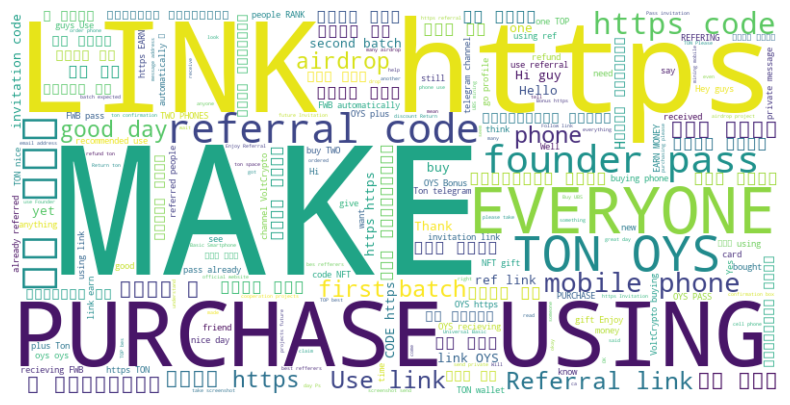

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(translated_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleaned_content = [" ".join([clean_token(word) for word in text.split()]) for text in translated_content]

In [ ]:
# Analyze sentiment using VADER
sentiment_scores = [analyzer.polarity_scores(text)['compound'] for text in cleaned_content]
sentiment_df = pd.DataFrame({
    'Date': pd.to_datetime(dates.iloc[list(range(len(translated_content)))]),
    'Sentiment': sentiment_scores
})

In [ ]:
sentiment_scores

[0.6731,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4574,
 0.0,
 0.7604,
 0.8964,
 0.5719,
 0.658,
 0.3382,
 0.0,
 0.0,
 -0.5789,
 -0.4574,
 0.0,
 0.8838,
 0.0,
 0.0,
 0.8838,
 0.6731,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5927,
 0.4278,
 0.0,
 0.0,
 0.3818,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4019,
 0.0,
 -0.4767,
 -0.4019,
 0.0,
 0.0,
 -0.5927,
 0.0,
 -0.296,
 0.0,
 0.743,
 0.0,
 0.0,
 0.0,
 0.7184,
 0.0,
 0.4588,
 0.8838,
 0.3182,
 0.0,
 0.6731,
 0.8964,
 0.0,
 -0.296,
 0.3612,
 0.0,
 -0.296,
 -0.4019,
 0.6239,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.0,
 -0.1603,
 -0.296,
 0.0,
 0.7096,
 0.6731,
 -0.296,
 0.0,
 0.0,
 0.3612,
 -0.296,
 0.0,
 0.2584,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8838,
 0.0,
 0.0,
 -0.296,
 -0.2924,
 -0.1877,
 0.0,
 0.0,
 0.6731,
 0.1531,
 -0.296,
 0.0,
 0.0,
 0.8964,
 0.0,
 0.0,
 0.8838,
 0.0,
 0.0,
 0.6731,
 0.743,
 0.0,
 0.0,
 0.0,
 0.0772,
 0.0,
 -0.1774,
 0.0,
 0.0,
 -0.3612,
 0.4019,
 0.4404,
 0.0,
 -0.296,
 0.7717,
 0.7096,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8838,
 -0.1779,
 -0.1

In [ ]:
# Aggregate sentiment scores by date
daily_sentiment = sentiment_df.groupby(sentiment_df['Date'].dt.date).mean()

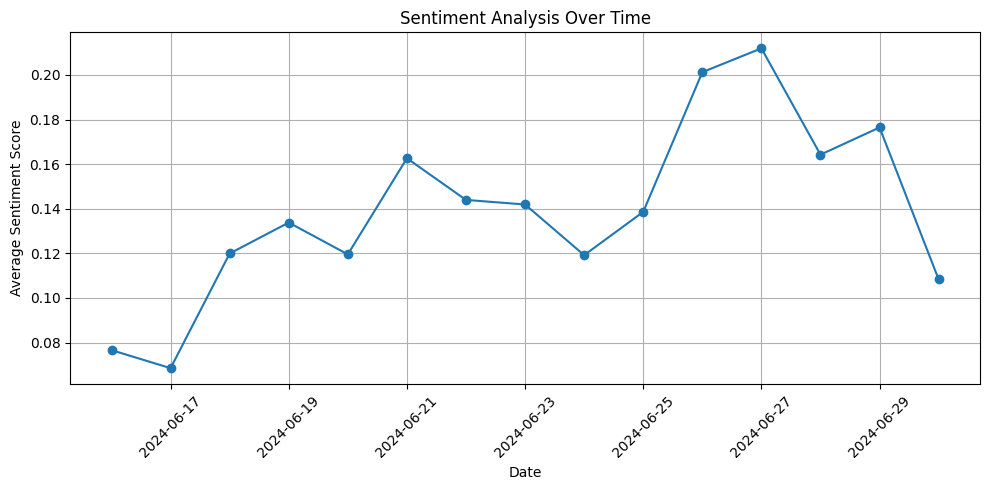

In [ ]:
# Plot the sentiment over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sentiment.index, daily_sentiment['Sentiment'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Analysis Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Initialize the BERT-based sentiment analysis pipeline with GPU support
device = 0 if torch.cuda.is_available() else -1  # -1 for CPU, 0 for the first GPU
bert_analyzer = pipeline('sentiment-analysis', model='bert-base-uncased', device=device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Function to safely split text into chunks that are less than or equal to 512 tokens
def split_into_chunks(text, max_length=510):  # 510 to account for [CLS] and [SEP]
    words = text.split()
    chunks = []
    current_chunk = []
    current_length = 0
    
    for word in words:
        if current_length + len(word) + 1 > max_length:
            chunks.append(" ".join(current_chunk))
            current_chunk = [word]
            current_length = len(word)
        else:
            current_chunk.append(word)
            current_length += len(word) + 1  # +1 for space

    if current_chunk:
        chunks.append(" ".join(current_chunk))
    
    return chunks


In [ ]:
# Function to analyze sentiment using chunked text
def analyze_sentiment(text):
    chunks = split_into_chunks(text)
    sentiment_scores = []

    for chunk in chunks:
        try:
            result = bert_analyzer(chunk)[0]
            score = result['score'] if result['label'] == 'POSITIVE' else -result['score']
            sentiment_scores.append(score)
        except Exception as e:
            print(f"Error analyzing chunk '{chunk}': {e}")
            sentiment_scores.append(0)  # Assume neutral sentiment on error

    return sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0

In [ ]:
# Apply sentiment analysis using ThreadPoolExecutor
sentiment_scores = []
with concurrent.futures.ThreadPoolExecutor() as executor:
    sentiment_scores = list(executor.map(analyze_sentiment, cleaned_content))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
c:\Users\Legion_Slim-7i\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [ ]:
sentiment_scores

[-0.5699456334114075,
 -0.5170711874961853,
 -0.5365313291549683,
 -0.5117273330688477,
 -0.5225280523300171,
 -0.5792123675346375,
 -0.5529282689094543,
 -0.5170711874961853,
 -0.5017547011375427,
 -0.5270700454711914,
 -0.5580999851226807,
 -0.5576042234897614,
 -0.5276235938072205,
 -0.5848444700241089,
 -0.5417033433914185,
 -0.5765514969825745,
 -0.5765514969825745,
 -0.5373523235321045,
 -0.5832909941673279,
 -0.5225280523300171,
 -0.581924319267273,
 -0.582732617855072,
 -0.5529282689094543,
 -0.581924319267273,
 -0.5699456334114075,
 -0.5487679243087769,
 -0.5318208336830139,
 -0.536535918712616,
 -0.5487679243087769,
 -0.5055369734764099,
 -0.5526495575904846,
 -0.536047637462616,
 -0.5435678362846375,
 -0.5138478875160217,
 -0.5353045463562012,
 -0.5318208336830139,
 -0.5097719430923462,
 -0.5503444671630859,
 -0.5352477431297302,
 -0.504804790019989,
 -0.553029477596283,
 -0.532017171382904,
 -0.5418971180915833,
 -0.553029477596283,
 -0.5401294827461243,
 -0.541005373001098

In [ ]:
# Filter the DataFrame to include only the rows that were successfully processed
filtered_df = df.iloc[:len(sentiment_scores)].copy()
filtered_df['Sentiment'] = sentiment_scores

In [ ]:
# Analyzing sentiment by dates
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
daily_sentiment = filtered_df.groupby(filtered_df['Date'].dt.date)['Sentiment'].mean().reset_index(name='Average Sentiment Score')

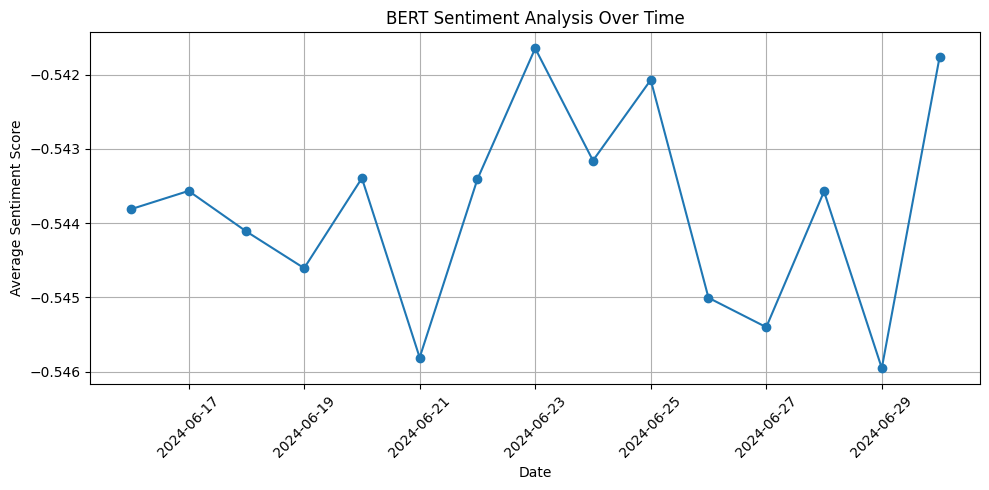

In [ ]:
# Plotting sentiment analysis over time
plt.figure(figsize=(10, 5))
plt.plot(daily_sentiment['Date'], daily_sentiment['Average Sentiment Score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('BERT Sentiment Analysis Over Time')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()